In [1]:
import pandas as pd
import numpy as np
import collections
import string


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apeksha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
traindf=pd.read_csv('../Data/train.csv', delimiter=',', header= 'infer' )
traindf.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# total number of records
traindf.shape

(7613, 5)

In [5]:
# unique columns
print(traindf.target.unique())
print(traindf.keyword.nunique())
print(traindf.location.nunique())

[1 0]
221
3341


In [6]:
# check for null columns
traindf.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

              id    target
id      1.000000  0.060781
target  0.060781  1.000000


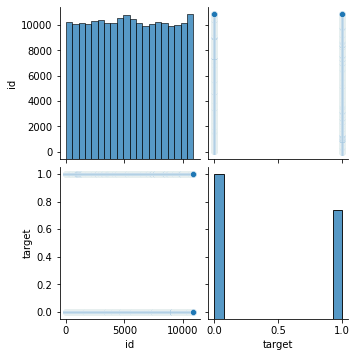

In [12]:
#get correlation among the columns  
# -- TODO : Why only two columns even after dropping the null values. Similar observations for the pair plot too.
traindf.corr()
sbn.pairplot(traindf)

3271
4342
difference:  -1071


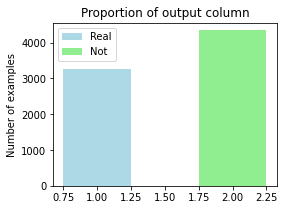

In [7]:
#check for data imbalance
Real_len = traindf[traindf['target'] == 1].shape[0]
Not_len = traindf[traindf['target'] == 0].shape[0]

print(Real_len)
print(Not_len)
print("difference: ", Real_len - Not_len) # slightly imbalanced data
traindf[traindf['target'] == 1] # Select traindf where traindf['target'] == 1

plt.rcParams['figure.figsize'] = (4, 3)
plt.bar(1,Real_len,0.5, label="Real", color='lightblue')
plt.bar(2,Not_len,0.5, label="Not", color='lightgreen')
plt.legend() # it is the label of what representing what in upper left corner
plt.ylabel('Number of examples')
plt.title('Proportion of output column')
plt.show()

In [8]:
traindf.dropna(inplace = True)
Real_len = traindf[traindf['target'] == 1].shape[0]
Not_len = traindf[traindf['target'] == 0].shape[0]
print(Real_len)
print(Not_len)
print("difference: ", Real_len - Not_len)
print("shape: ",traindf.shape)
# slightly imbalanced data

2196
2884
difference:  -688
shape:  (5080, 5)


In [9]:
def getLenOfTweet(tweet):
    return len(tweet)
traindf['length']=traindf['text'].apply(getLenOfTweet)

traindf[traindf['length'] == max(traindf['length'])]

,id,keyword,location,text,target,length
4801,6833,loud%20bang,london essex england uk,It's was about 2:30 in the morning&amp;I went ...,0,152


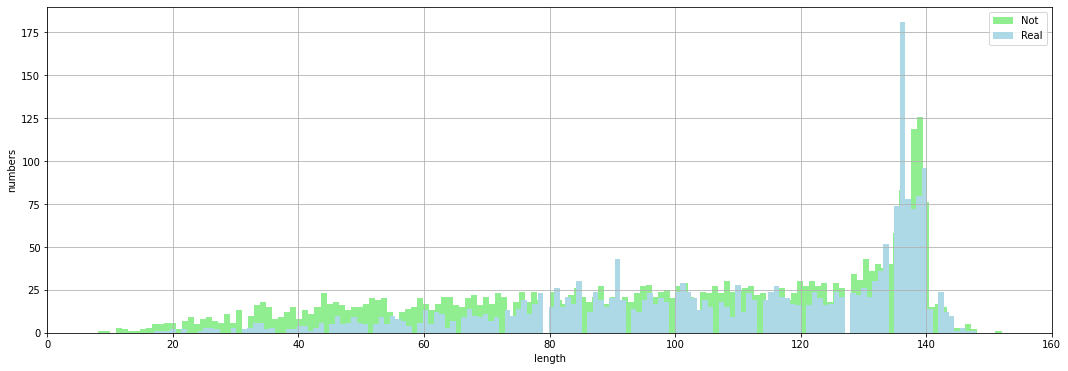

In [10]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(traindf[traindf['target'] == 0]['length'], alpha = 1, bins=bins, label='Not', color = 'lightgreen')
plt.hist(traindf[traindf['target'] == 1]['length'], alpha = 1, bins=bins, label='Real', color= 'lightblue')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,160)
plt.grid()
plt.show()

In [11]:
max(traindf[traindf['target']==1]['text'].str.len())

148

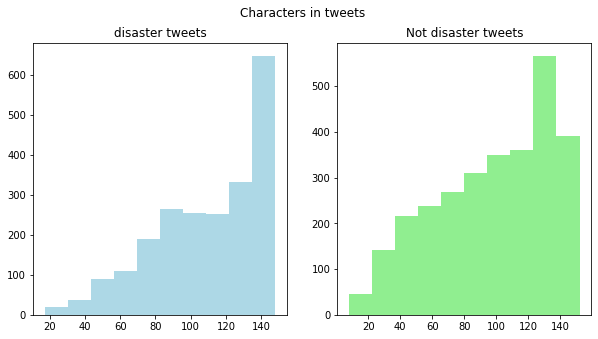

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

tweet_len=traindf[traindf['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='lightblue')
ax1.set_title('disaster tweets')

tweet_len=traindf[traindf['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='lightgreen')
ax2.set_title('Not disaster tweets')

fig.suptitle('Characters in tweets')
plt.show()

/home/apeksha/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/apeksha/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'not disaster tweets word len')

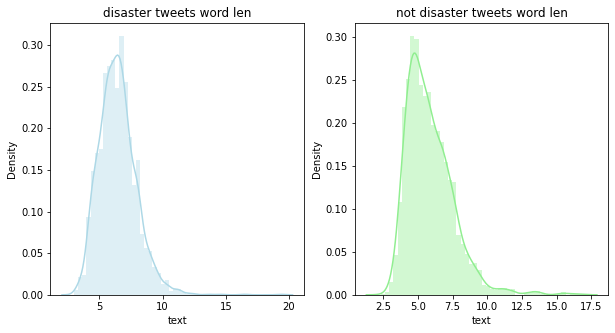

In [13]:
# finding the world length for each tweet and get the avergae word length
def getWordLen(str): 
    return [len(s) for s in str]

real_word_len = traindf[traindf['target'] == 1]['text'].str.split().apply(getWordLen)
not_real_word_len = traindf[traindf['target'] == 0]['text'].str.split().apply(getWordLen)

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
sbn.distplot(real_word_len.map(lambda x: np.mean(x)), ax=ax1, color = 'lightblue')
ax1.set_title('disaster tweets word len')

sbn.distplot(not_real_word_len.map(lambda x: np.mean(x)), ax=ax2, color = 'lightgreen')
ax2.set_title('not disaster tweets word len')



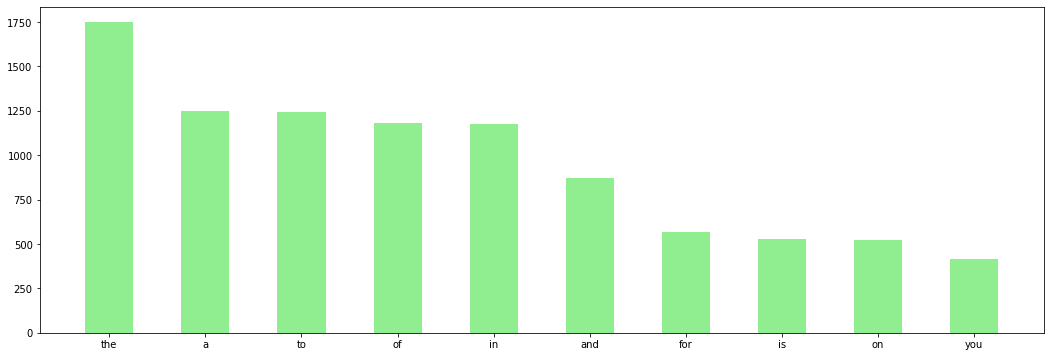

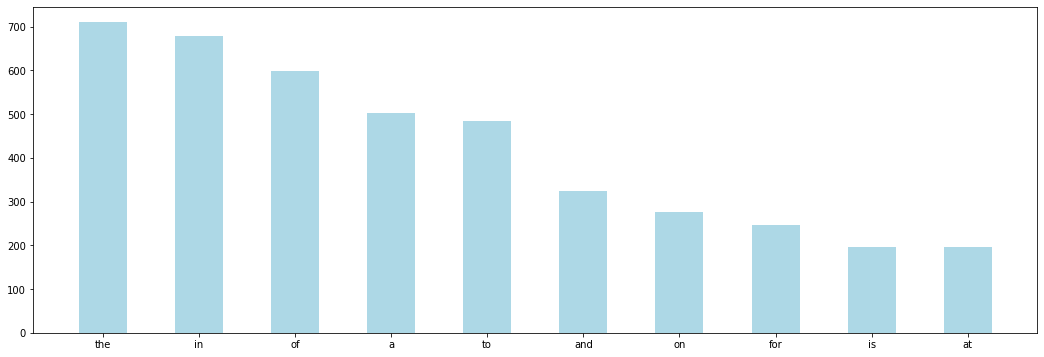

In [14]:
# get the count of stop words in all the tweets of that class

stop=set(stopwords.words('english'))

#collection of words banana hai.. Tweets ka
def create_corpus(targetLabel):
    corpus = []
    for wordsList in traindf[traindf['target'] == targetLabel]['text'].str.split():
        for word in wordsList:
            corpus.append(word)
    return corpus

stopDict = collections.defaultdict(int) #-- default dict never raises a key error as it always has a default key 
for word in create_corpus(1):
    if(word in stop): 
        stopDict[word] += 1
        
real_top10 = sorted(stopDict.items(), key = lambda item: item[1], reverse = True)[:10]  # key = sorting key

for word in create_corpus(0):
    if(word in stop): 
        stopDict[word] += 1
        
not_real_top10 = sorted(stopDict.items(), key = lambda item: item[1], reverse = True)[:10]  # key = sorting key

plt.rcParams['figure.figsize'] = (18.0, 6.0)
word,freq = zip(*not_real_top10) # used for unpacking
plt.bar(word, freq, width=0.5, color= 'lightgreen')
plt.show()

word,freq = zip(*real_top10) # used for unpacking
plt.bar(word, freq, width=0.5, color = 'lightblue')
plt.show()

<BarContainer object of 18 artists>

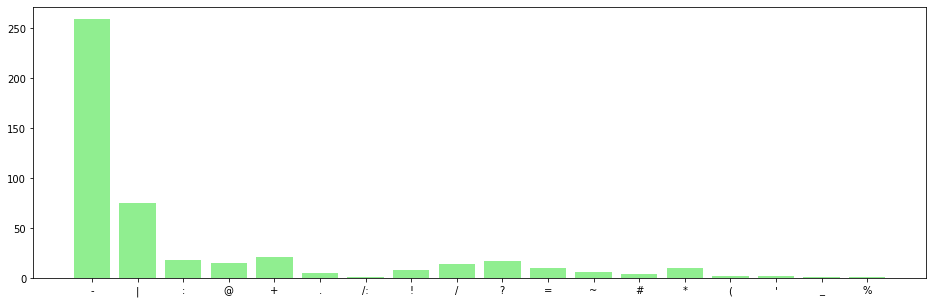

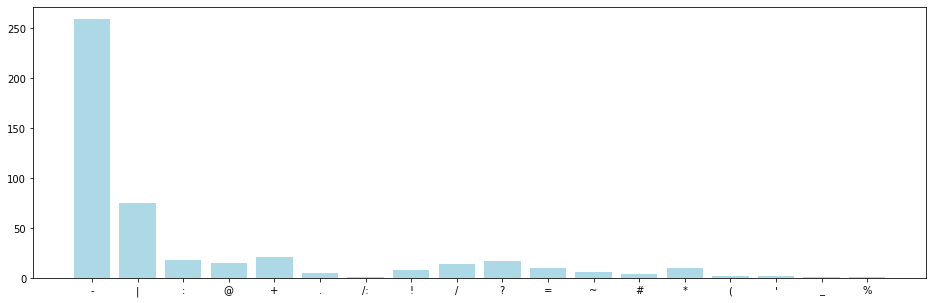

In [15]:
# Analysis of Punctuation words

plt.figure(figsize=(16,5))
corpus=create_corpus(0)
dic=collections.defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='lightgreen')

plt.figure(figsize=(16,5))
corpus=create_corpus(0)
dic=collections.defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='lightblue')

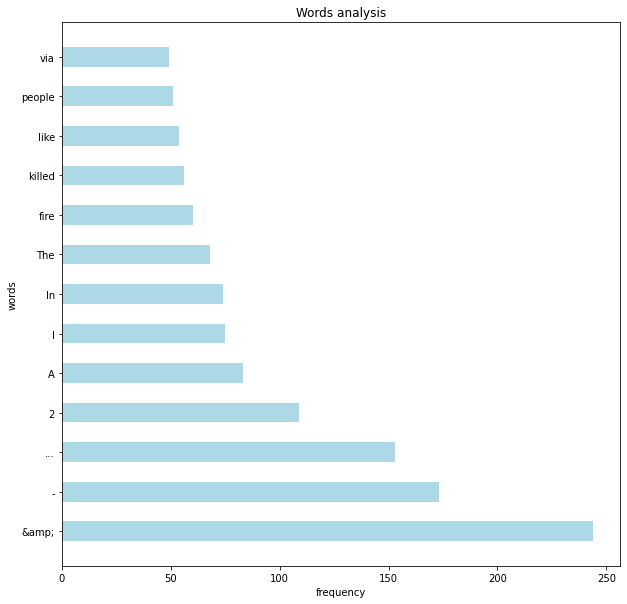

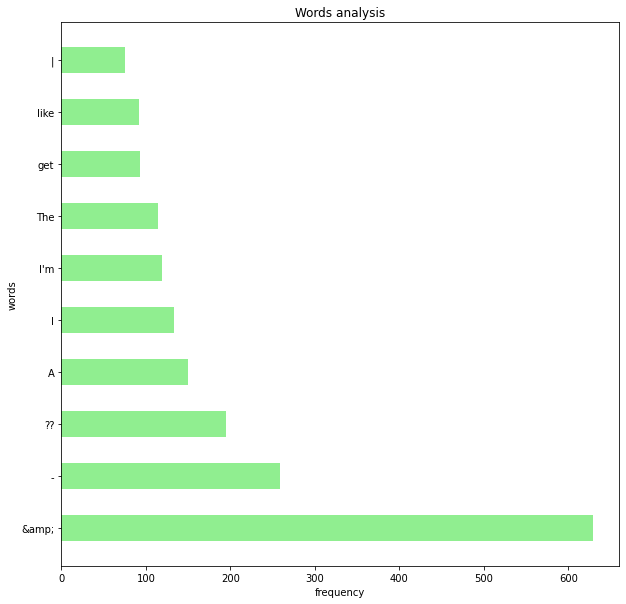

In [16]:
# analyze words
from collections import Counter
real_counter = Counter(create_corpus(1))
words = []
frequency = []

for word,freq in real_counter.most_common(50):
    if word not in stop:
        words.append(word)
        frequency.append(freq)

plt.figure(figsize = (10,10)) 
plt.barh(sorted(words), frequency, height = 0.5, color = 'lightblue')
plt.xlabel('frequency')
plt.ylabel('words')
plt.title('Words analysis')
plt.show()

from collections import Counter
not_real_counter = Counter(create_corpus(0))
words = []
frequency = []

for word,freq in not_real_counter.most_common(50):
    if word not in stop:
        words.append(word)
        frequency.append(freq)

plt.figure(figsize = (10,10)) 
plt.barh(sorted(words), frequency, height = 0.5, color = 'lightgreen')
plt.xlabel('frequency')
plt.ylabel('words')
plt.title('Words analysis')
plt.show()

# sbn.barplot(x = frequency, y = words) - gives you colorful bars. :)


<AxesSubplot:>

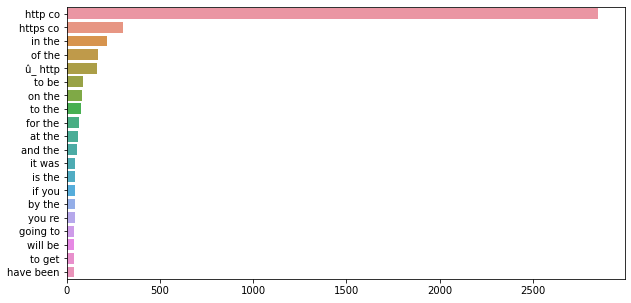

In [17]:

def getTopTweetsNgrams(tweets, n = 2):
    countVec = CountVectorizer(ngram_range = (2,2)).fit(tweets)
    bag_of_words = countVec.transform(tweets)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, indx]) for word,indx in countVec.vocabulary_.items()]
    sorted_word_freq = sorted(words_freq, key = lambda words_freq: words_freq[1], reverse = True)
    return sorted_word_freq

getTopTweetsNgrams(traindf['text'])

plt.figure(figsize = (10,5))
top_tweet_bigrams = getTopTweetsNgrams(traindf['text'])[:20]
x,y = map(list, zip(*top_tweet_bigrams))
sbn.barplot(x = y,y = x)

In [38]:
# Find top hash tags.
def get_hashtags(tweets):
    hashtags = list()
    for tweet in tweets:
        for word in tweet.split():
            if word.startswith("#"):
                hashtags.append(word)
    return hashtags
                           
hashtags = get_hashtags(traindf["text"])
print(len(hashtags))

from collections import Counter
hashtags_count = Counter(hashtags)

2220


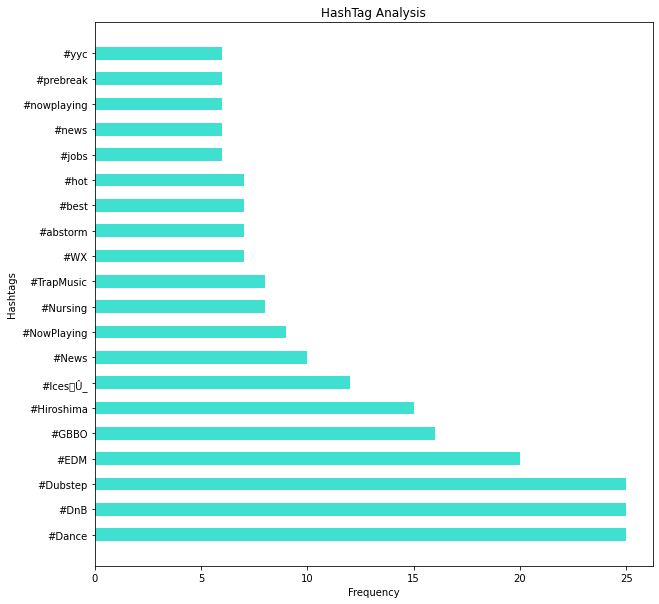

In [51]:
words = []
frequency = []

for word,freq in hashtags_count.most_common(20):
    if word not in stop:
        words.append(word)
        frequency.append(freq)

plt.figure(figsize = (10,10)) 
plt.barh(sorted(words), frequency, height = 0.5, color = 'turquoise')
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.title('HashTag Analysis')
plt.show()

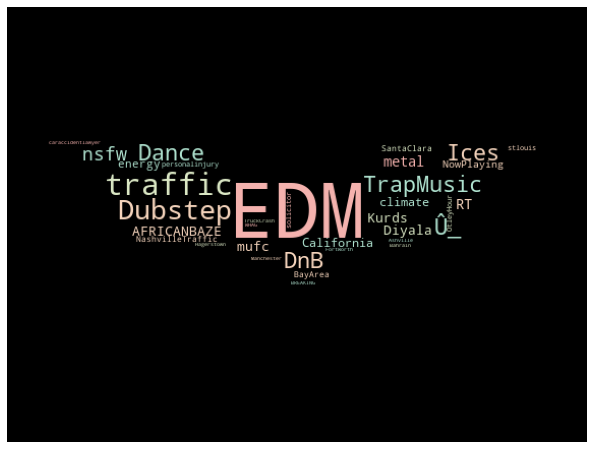

In [71]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

def multi_color_func(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    colors = [[4, 77, 82],
              [25, 74, 85],
              [82, 43, 84],
              [158, 48, 79]]
    rand = random_state.randint(0, len(colors) - 1)
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])


mask = np.array(Image.open('bat.jpg'))


plt.figure(figsize=(12,8))
word_cloud = WordCloud(color_func=multi_color_func, mask=mask, background_color='black', max_font_size = 80).generate("".join(hashtags[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()